### Q1

In [26]:
import keras


data = keras.datasets.cifar10.load_data()

In [27]:
# len(data), len(data[0]), len(data[1])
data[0][0].shape, data[0][1].shape, data[1][0].shape, data[1][1].shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [28]:
(X_train, y_train), (X_test, y_test) = data

In [29]:
from sklearn.model_selection import train_test_split

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [40]:
model = keras.models.Sequential([
    keras.layers.InputLayer(shape=X_train[0].shape),
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-2),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,322 (661.41 KB)

 Trainable params: 169,322 (661.41 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_val = keras.utils.to_categorical(y_val)

In [42]:
hist = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.0996 - loss: 2.3041 - val_accuracy: 0.1022 - val_loss: 2.3039
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.0990 - loss: 2.3041 - val_accuracy: 0.1050 - val_loss: 2.3028
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.1027 - loss: 2.3036 - val_accuracy: 0.1056 - val_loss: 2.3044
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.1013 - loss: 2.3038 - val_accuracy: 0.0972 - val_loss: 2.3034
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.1009 - loss: 2.3037 - val_accuracy: 0.0972 - val_loss: 2.3031
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.0991 - loss: 2.3040 - val_accuracy: 0.1050 - val_loss: 2.3034
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.0991 - loss: 2.3042 - val_accuracy: 0.0956 - val_loss: 2.3048
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.1007 - 

In [43]:
model.evaluate(X_test, y_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0983 - loss: 2.3032


[2.3032546043395996, 0.09880000352859497]

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


<Axes: >

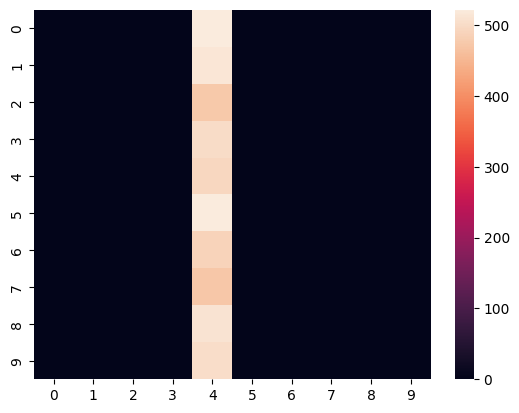

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test.argmax(axis=-1), model.predict(X_test).argmax(axis=-1)))

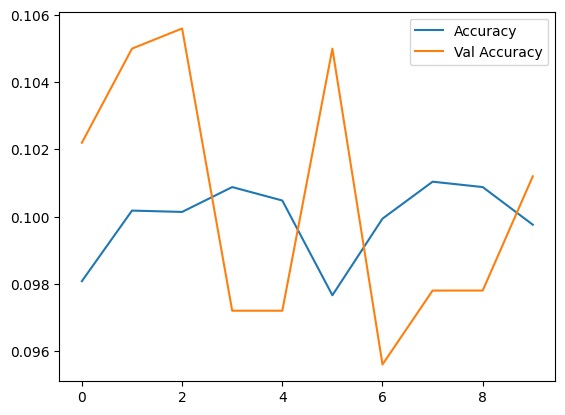

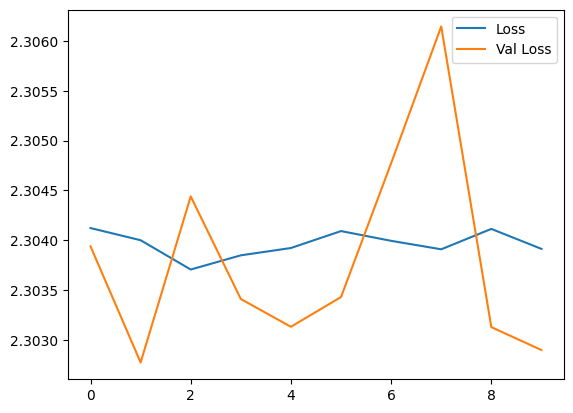

In [54]:
import matplotlib.pyplot as plt

acc, loss = hist.history['accuracy'], hist.history['loss']
val_acc, val_loss = hist.history['val_accuracy'], hist.history['val_loss']

plt.figure()
sns.lineplot(acc, label='Accuracy')
sns.lineplot(val_acc, label='Val Accuracy')
plt.legend()
plt.show()

plt.figure()
sns.lineplot(loss, label='Loss')
sns.lineplot(val_loss, label='Val Loss')
plt.legend()
plt.show()